In [1]:
# 단층 LSTM과 같으나 다층으로 설계해보았고 최종적으로 예측값을 제시하는 코드가 삽입되었음

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
from datetime import datetime
from datetime import timedelta
from pandas import Series, DataFrame
import scipy.stats

import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [2]:
kor = pd.read_excel('./kor.xlsx', sheet_name='Sheet1')
ger = pd.read_excel('./german.xlsx', sheet_name='Sheet1')
ita = pd.read_excel('./italy.xlsx', sheet_name='Sheet1')
usa = pd.read_excel('./states.xlsx', sheet_name='Sheet1')
mex = pd.read_excel('./mexico.xlsx',sheet_name = 'Sheet1')
uk = pd.read_excel('./uk_par.xlsx', sheet_name = 'Sheet1')
kor_cold = pd.read_excel('./인플루엔자.xlsx', sheet_name='Sheet1')

sgp_sars = pd.read_excel('./호흡기바이러스확진추이.xlsx', sheet_name='사스싱가폴')
hk_sars = pd.read_excel('./호흡기바이러스확진추이.xlsx', sheet_name='사스홍콩')
kor_mers = pd.read_excel('./호흡기바이러스확진추이.xlsx', sheet_name='메르스한국')

In [3]:
############# LSTM 함수 #######################

scaler = MinMaxScaler(feature_range=(0, 1))

def build_data(input_data):
    clmns = input_data.columns
    temp1 = input_data.set_index(clmns[0])
    temp2 = temp1[clmns[1]].values
    temp3 = temp2.reshape(-1,1)
    temp4 = scaler.fit_transform(temp3)
    return temp4

look_back = 3

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True,
               input_shape=(look_back, 1)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

69.05096464625073


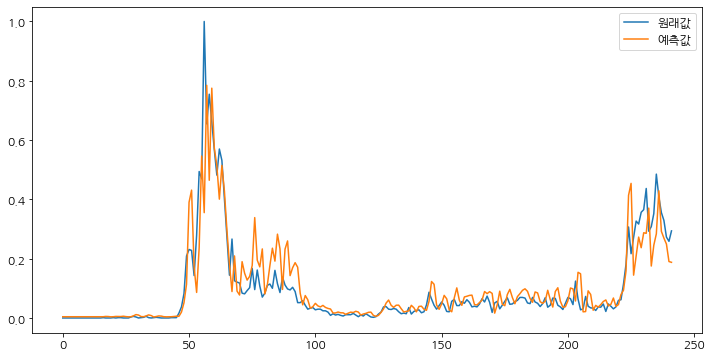

In [6]:
kor_dataset = build_data(kor)
trainX, trainY = create_dataset(kor_dataset, look_back)
trainX_reshape = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))

corona = pd.read_excel('./data.xlsx', sheet_name= 'data')
corona_dataset = build_data(corona)
corona_list = corona_dataset.tolist()
test_dataset = corona_dataset

model.fit(trainX_reshape, trainY, epochs=1000, batch_size=240, verbose=0)

testX, testY = create_dataset(corona_dataset, look_back)
testX_reshape = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

trainPredict = model.predict(trainX_reshape)
testPredict = model.predict(testX_reshape)


trainPredict_rescale = scaler.inverse_transform(trainPredict)
trainY_rescale = scaler.inverse_transform([trainY])
testPredict_rescale = scaler.inverse_transform(testPredict)
testY_rescale = scaler.inverse_transform([testY])

testScore = math.sqrt(mean_squared_error(testY_rescale[0], testPredict_rescale[:,0]))


testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict_rescale)+look_back, :] = testPredict_rescale

ori_to_show = testY.reshape(-1,1)
prd_to_show = testPredict

plt.figure(figsize=(12, 6))
plt.plot(ori_to_show, label = '원래값')
plt.plot(prd_to_show, label = '예측값')
plt.legend(loc = 'best')
print(testScore)
plt.show()

63.49708240665197


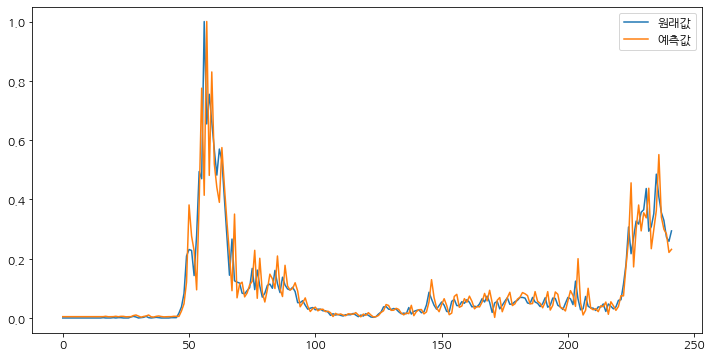

In [7]:
kor_dataset = build_data(kor_cold)
trainX, trainY = create_dataset(kor_dataset, look_back)
trainX_reshape = np.reshape(trainX, (trainX.shape[0],trainX.shape[1], 1))

corona = pd.read_excel('./data.xlsx', sheet_name= 'data')
corona_dataset = build_data(corona)
corona_list = corona_dataset.tolist()
test_dataset = corona_dataset

model.fit(trainX_reshape, trainY, epochs=1000, batch_size=240, verbose=0)

testX, testY = create_dataset(corona_dataset, look_back)
testX_reshape = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

trainPredict = model.predict(trainX_reshape)
testPredict = model.predict(testX_reshape)


trainPredict_rescale = scaler.inverse_transform(trainPredict)
trainY_rescale = scaler.inverse_transform([trainY])
testPredict_rescale = scaler.inverse_transform(testPredict)
testY_rescale = scaler.inverse_transform([testY])

testScore = math.sqrt(mean_squared_error(testY_rescale[0], testPredict_rescale[:,0]))


testPredictPlot = np.empty_like(test_dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict_rescale)+look_back, :] = testPredict_rescale

ori_to_show = testY.reshape(-1,1)
prd_to_show = testPredict

plt.figure(figsize=(12, 6))
plt.plot(ori_to_show, label = '원래값')
plt.plot(prd_to_show, label = '예측값')
plt.legend(loc = 'best')
print(testScore)
plt.show()

In [8]:
# 날짜를 입력하면 전날까지의 데이터만 받아서 내일의 확진자를 예측해주는 코드

In [ ]:
print('오늘 날짜를 입력해주세요 (2020-02-01 ~ 2020-09-03까지)')
today = input()
today_date = datetime.strptime(today,'%Y-%m-%d')
tomorrow = today_date + timedelta(days = 1)

corona_set = corona[corona['Unnamed: 0'] <= today_date]
corona_dataset = build_data(corona_set)

testX, testY = create_dataset(corona_dataset, look_back)
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

testPredict = model.predict(testX)

scale = max(corona_set['new_cases'])
answer = testPredict[-1][0] * scale

print('내일({0}일)의 예측 확진자는 {1} ~ {2}명 입니다.'.format(tomorrow.day, answer*0.7, answer*1.3))

오늘 날짜를 입력해주세요 (2020-02-01 ~ 2020-09-03까지)
